In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calibration_08302023 as cal
import sys
sys.path.append('../../')
from utils import *
from fears.utils import AutoRate

rfu30_to_dilution = cal.run()

folder_path = '../experiment_data/aggregate_exp'

In [31]:
plates,data = get_timeseries(folder_path,plate_num=None)

cols = ['2','3','4']

exp_layout = {'original_well':['B','C','D'],
              'transfer_well':['E','F','G']}

cell_count_log = {'original_well_mean':[],
                  'transfer_well_mean':[],
                  'original_well_err':[],
                  'transfer_well_err':[]}

cell_count = {'original_well_mean':[],
              'transfer_well_mean':[],
              'original_well_err':[],
              'transfer_well_err':[]}

time_vect = []

for i,col in enumerate(cols):
    data_t = data[i]

    time_vect.append(plates[i].get_start_time())

    original_well = []
    transfer_well = []

    for row in exp_layout['original_well']:
        key = row+col
        original_well.append(data_t[key])
    
    for row in exp_layout['transfer_well']:
        key = row+col

        transfer_well.append(data_t[key])
    
    original_well = rfu30_to_dilution(original_well)
    transfer_well = rfu30_to_dilution(transfer_well)

    original_log = np.log10(original_well)
    transfer_log = np.log10(transfer_well)

    original_well_mean = np.mean(original_well)
    transfer_well_mean = np.mean(transfer_well)

    original_well_err = np.std(original_well)/np.sqrt(len(original_well))
    transfer_well_err = np.std(transfer_well)/np.sqrt(len(transfer_well))

    cell_count['original_well_mean'].append(original_well_mean)
    cell_count['transfer_well_mean'].append(transfer_well_mean)
    cell_count['original_well_err'].append(original_well_err)
    cell_count['transfer_well_err'].append(transfer_well_err)

    original_well_mean = np.mean(original_log)
    transfer_well_mean = np.mean(transfer_log)

    original_well_err = np.std(original_log)/np.sqrt(len(original_log))
    transfer_well_err = np.std(transfer_log)/np.sqrt(len(transfer_log))

    cell_count_log['original_well_mean'].append(original_well_mean)
    cell_count_log['transfer_well_mean'].append(transfer_well_mean)
    cell_count_log['original_well_err'].append(original_well_err)
    cell_count_log['transfer_well_err'].append(transfer_well_err)

time = []

t0 = time_vect[0]
for t in time_vect:
    time.append((t-t0).total_seconds()/60)

time = np.array(time)

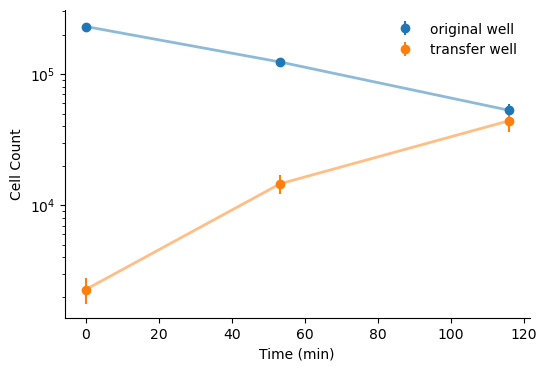

In [32]:
fig,ax = plt.subplots(figsize=(6,4))

ax.errorbar(time,cell_count['original_well_mean'],yerr=cell_count['original_well_err'],label='original well',fmt='o',color='C0')
ax.errorbar(time,cell_count['transfer_well_mean'],yerr=cell_count['transfer_well_err'],label='transfer well',fmt='o',color='C1')

ax.plot(time,cell_count['original_well_mean'],color='C0',linewidth=2,alpha=0.5)
ax.plot(time,cell_count['transfer_well_mean'],color='C1',linewidth=2,alpha=0.5)

ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell Count')

ax.set_yscale('log')

ax.legend(frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)